In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.2 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.1 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import os
import cv2
import shutil
import random
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from IPython.display import HTML, Video, Image, clear_output
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
img_path='/kaggle/input/datasets/iasadpanwhar/football-player-detection-yolov8/football_players_detection/football_players_detection/train/images'

In [4]:
destination = "frame"
if not os.path.exists(destination):
    os.makedirs(destination)

files=os.listdir(img_path)

for filename in files[0:2]:
    src_path = os.path.join(img_path, filename)
    if filename.endswith(".jpg"):
        dst_path = os.path.join(destination, filename)
        shutil.copyfile(src_path, dst_path)

In [5]:
path_frame='./frame'
path_fig='./fig'

In [6]:
model = YOLO("yolov8x.pt")

In [7]:
!yolo task=detect mode=predict model=yolov8x.pt conf=0.7 source={path_frame} save=True

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)


YOLOv8x summary (fused): 112 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs



image 1/2 /kaggle/working/frame/158_pp_jpg.rf.7933130c6ce5eef183e1cd848bb17142.jpg: 640x640 3 persons, 2896.7ms


image 2/2 /kaggle/working/frame/55019_jpg.rf.070d633455d557cfc06e2a96e6736b26.jpg: 640x640 3 persons, 2784.7ms
Speed: 7.5ms preprocess, 2840.7ms inference, 14.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [8]:
path_run='/kaggle/working/runs/detect/predict'

In [9]:
paths0=[]
for dirname, _, filenames in os.walk(path_run):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            paths0+=[(os.path.join(dirname, filename))]
paths0=sorted(paths0)
images0=[]
for i in tqdm(range(len(paths0))):
    images0+=[cv2.imread(paths0[i])]

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 80.28it/s]

In [10]:
def create_animation(ims):
    fig=plt.figure(figsize=(12,8))
    im=plt.imshow(cv2.cvtColor(ims[0],cv2.COLOR_BGR2RGB))
    text = plt.text(0.05, 0.05, f'Slide {0}', transform=fig.transFigure, fontsize=14, color='blue')
    plt.axis('off')
    plt.close()

    def animate_func(i):
        im.set_array(cv2.cvtColor(ims[i],cv2.COLOR_BGR2RGB))
        text.set_text(f'Slide {i}')
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000)

create_animation(np.array(images0))

In [11]:
results = model.predict(path_frame,conf=0.7)
print(len(results))

image 1/2 /kaggle/working/frame/158_pp_jpg.rf.7933130c6ce5eef183e1cd848bb17142.jpg: 640x640 3 persons, 2917.7ms


image 2/2 /kaggle/working/frame/55019_jpg.rf.070d633455d557cfc06e2a96e6736b26.jpg: 640x640 3 persons, 2768.9ms


Speed: 3.7ms preprocess, 2843.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


2


In [12]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0.])
conf: tensor([0.8667, 0.7217, 0.7178])
data: tensor([[4.7613e+02, 9.7758e+02, 5.1997e+02, 1.1177e+03, 8.6665e-01, 0.0000e+00],
        [2.9291e+02, 7.6653e+02, 3.3460e+02, 8.6981e+02, 7.2173e-01, 0.0000e+00],
        [9.4646e+02, 1.0456e+03, 9.8164e+02, 1.2163e+03, 7.1776e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1280, 1280)
shape: torch.Size([3, 6])
xywh: tensor([[ 498.0485, 1047.6235,   43.8452,  140.0803],
        [ 313.7569,  818.1713,   41.6874,  103.2837],
        [ 964.0513, 1130.9460,   35.1862,  170.6216]])
xywhn: tensor([[0.3891, 0.8185, 0.0343, 0.1094],
        [0.2451, 0.6392, 0.0326, 0.0807],
        [0.7532, 0.8836, 0.0275, 0.1333]])
xyxy: tensor([[ 476.1259,  977.5834,  519.9711, 1117.6637],
        [ 292.9132,  766.5295,  334.6006,  869.8132],
        [ 946.4583, 1045.6353,  981.6444, 1216.2568]])
xyxyn: tensor([[0.3720, 0.7637, 0.4062, 0.8732],
        [0.2288, 0.5989, 0.

In [13]:
BOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):
    cpu_tensor = results[i].boxes.data.cpu().detach().numpy()
    arri = pd.DataFrame(cpu_tensor).astype(float)
    arri['i']=i
    BOX=pd.concat([BOX,arri],axis=0)
BOX.columns=['x','y','x2','y2','confidence','class','i']
display(BOX)

/tmp/ipykernel_17/1397763775.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  BOX=pd.concat([BOX,arri],axis=0)


,x,y,x2,y2,confidence,class,i
0,476.125916,977.583374,519.971130,1117.663696,0.866650,0.0,0.0
1,292.913239,766.529480,334.600616,869.813171,0.721731,0.0,0.0
2,946.458252,1045.635254,981.644409,1216.256836,0.717756,0.0,0.0
0,578.354919,28.547653,610.118591,167.707855,0.809855,0.0,1.0
1,964.026672,20.750565,998.276794,120.840424,0.790052,0.0,1.0
2,600.223145,248.206894,633.263916,404.199829,0.702253,0.0,1.0


In [14]:
class_map = {0: u'__background__', 1: u'person', 2: u'bicycle',3: u'car', 4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', 8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 33: u'sports ball', 34: u'kite', 35: u'baseball bat', 36: u'baseball glove', 37: u'skateboard', 38: u'surfboard', 39: u'tennis racket', 40: u'bottle', 41: u'wine glass', 42: u'cup', 43: u'fork', 44: u'knife', 45: u'spoon', 46: u'bowl', 47: u'banana', 48: u'apple', 49: u'sandwich', 50: u'orange', 51: u'broccoli', 52: u'carrot', 53: u'hot dog', 54: u'pizza', 55: u'donut', 56: u'cake', 57: u'chair', 58: u'couch', 59: u'potted plant', 60: u'bed', 61: u'dining table', 62: u'toilet', 63: u'tv', 64: u'laptop', 65: u'mouse', 66: u'remote', 67: u'keyboard', 68: u'cell phone', 69: u'microwave', 70: u'oven', 71: u'toaster', 72: u'sink', 73: u'refrigerator', 74: u'book', 75: u'clock', 76: u'vase', 77: u'scissors', 78: u'teddy bear', 79: u'hair drier', 80: u'toothbrush'}

In [15]:
BOX['class']=BOX['class'].apply(lambda x: class_map[int(x)+1])
BOX=BOX.reset_index(drop=True)
display(BOX)
display(BOX['class'].value_counts())

,x,y,x2,y2,confidence,class,i
0,476.125916,977.583374,519.971130,1117.663696,0.866650,person,0.0
1,292.913239,766.529480,334.600616,869.813171,0.721731,person,0.0
2,946.458252,1045.635254,981.644409,1216.256836,0.717756,person,0.0
3,578.354919,28.547653,610.118591,167.707855,0.809855,person,1.0
4,964.026672,20.750565,998.276794,120.840424,0.790052,person,1.0
5,600.223145,248.206894,633.263916,404.199829,0.702253,person,1.0


class
person    6
Name: count, dtype: int64

In [16]:
data0 = BOX.query("`class` == 'person' and `confidence` > 0.7")
data0['i']=data0['i'].apply(lambda x: int(x))
data0['path']=data0['i'].apply(lambda x:os.path.join('./frame',files[x]))
data0=data0.reset_index(drop=True)
data0['j']=data0.index.tolist()
display(data0)

,x,y,x2,y2,confidence,class,i,path,j
0,476.125916,977.583374,519.971130,1117.663696,0.866650,person,0,./frame/158_pp_jpg.rf.7933130c6ce5eef183e1cd84...,0
1,292.913239,766.529480,334.600616,869.813171,0.721731,person,0,./frame/158_pp_jpg.rf.7933130c6ce5eef183e1cd84...,1
2,946.458252,1045.635254,981.644409,1216.256836,0.717756,person,0,./frame/158_pp_jpg.rf.7933130c6ce5eef183e1cd84...,2
3,578.354919,28.547653,610.118591,167.707855,0.809855,person,1,./frame/55019_jpg.rf.070d633455d557cfc06e2a96e...,3
4,964.026672,20.750565,998.276794,120.840424,0.790052,person,1,./frame/55019_jpg.rf.070d633455d557cfc06e2a96e...,4
5,600.223145,248.206894,633.263916,404.199829,0.702253,person,1,./frame/55019_jpg.rf.070d633455d557cfc06e2a96e...,5


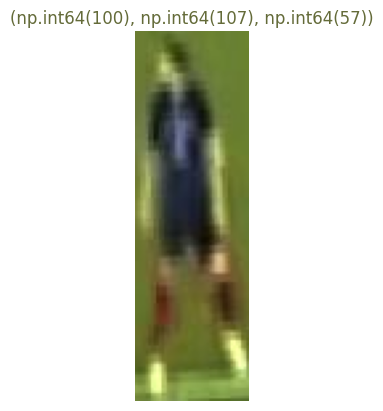

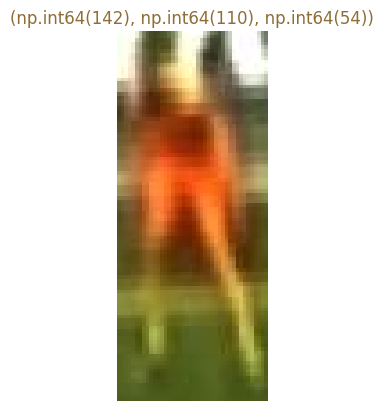

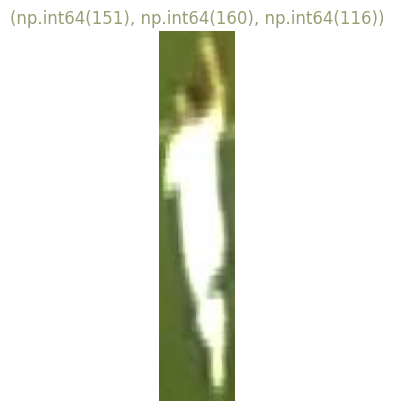

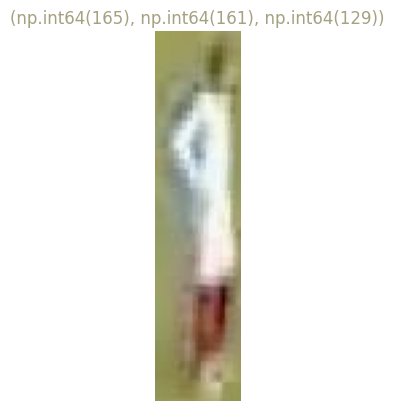

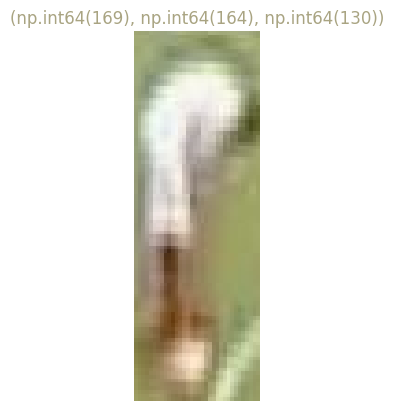

In [17]:
for i in range(5):#len(data0)
    path=data0.iloc[i,7]
    x=int(data0.iloc[i,0])
    y=int(data0.iloc[i,1])
    x2=int(data0.iloc[i,2])
    y2=int(data0.iloc[i,3])
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    w,h=img.shape[0],img.shape[1]
    #img=cv2.rectangle(img,(x,y),(x2,y2),(0,255,0),2)
    img2=img[y:y2,x:x2,:]
    color=tuple(np.mean(img2,axis=(0,1)).astype(int))
    data0.loc[i,'color']=str(color)
    plt.title(str(color),color=(color[0]/255,color[1]/255,color[2]/255))
    plt.imshow(img2)
    plt.axis('off')
    plt.show()

In [18]:
!pip install ultralytics

from ultralytics import YOLO
import cv2

# Load model
model = YOLO("yolov8n.pt")  # bản nhẹ

# Đường dẫn video
video_path = "/kaggle/input/datasets/iasadpanwhar/football-player-detection-yolov8/video.mp4"

cap = cv2.VideoCapture(video_path)

# Lấy thông số video
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = int(cap.get(cv2.CAP_PROP_FPS))

# Tạo file output
out = cv2.VideoWriter(
    "output.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (width, height)
)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect chỉ class person
    results = model(frame, classes=[0])

    annotated = results[0].plot()

    out.write(annotated)

cap.release()
out.release()

print("Done! Video đã lưu thành output.mp4")


0: 384x640 22 persons, 113.8ms


Speed: 3.1ms preprocess, 113.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


[aac @ 0x2f39a3c0] Input buffer exhausted before END element found


0: 384x640 17 persons, 96.0ms


Speed: 3.3ms preprocess, 96.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 95.2ms


Speed: 2.8ms preprocess, 95.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 109.8ms


Speed: 3.2ms preprocess, 109.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 102.9ms


Speed: 3.1ms preprocess, 102.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 96.0ms


Speed: 2.3ms preprocess, 96.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 96.8ms


Speed: 2.6ms preprocess, 96.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 16 persons, 107.9ms


Speed: 2.1ms preprocess, 107.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 107.9ms


Speed: 3.3ms preprocess, 107.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 16 persons, 100.8ms


Speed: 2.2ms preprocess, 100.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 94.7ms


Speed: 2.5ms preprocess, 94.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 9 persons, 96.5ms


Speed: 2.2ms preprocess, 96.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 14 persons, 100.2ms


Speed: 3.0ms preprocess, 100.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 8 persons, 98.5ms


Speed: 2.3ms preprocess, 98.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 7 persons, 98.5ms


Speed: 2.5ms preprocess, 98.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 7 persons, 101.0ms


Speed: 2.6ms preprocess, 101.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 1 person, 102.1ms


Speed: 2.9ms preprocess, 102.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 10 persons, 89.6ms


Speed: 2.7ms preprocess, 89.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 2 persons, 94.3ms


Speed: 6.5ms preprocess, 94.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 10 persons, 101.9ms


Speed: 2.8ms preprocess, 101.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 (no detections), 108.1ms


Speed: 2.4ms preprocess, 108.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 (no detections), 91.8ms


Speed: 2.6ms preprocess, 91.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 (no detections), 97.1ms


Speed: 2.7ms preprocess, 97.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 (no detections), 104.8ms


Speed: 2.7ms preprocess, 104.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 (no detections), 99.6ms


Speed: 2.9ms preprocess, 99.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 1 person, 103.6ms


Speed: 2.6ms preprocess, 103.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 (no detections), 97.7ms


Speed: 2.8ms preprocess, 97.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 6 persons, 90.6ms


Speed: 2.6ms preprocess, 90.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 1 person, 96.4ms


Speed: 2.6ms preprocess, 96.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 (no detections), 87.6ms


Speed: 2.7ms preprocess, 87.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 6 persons, 92.3ms


Speed: 2.6ms preprocess, 92.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 (no detections), 96.6ms


Speed: 2.8ms preprocess, 96.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 (no detections), 88.3ms


Speed: 2.7ms preprocess, 88.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 (no detections), 94.6ms


Speed: 2.7ms preprocess, 94.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 2 persons, 93.5ms


Speed: 2.6ms preprocess, 93.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 13 persons, 95.5ms


Speed: 2.1ms preprocess, 95.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 2 persons, 92.6ms


Speed: 2.8ms preprocess, 92.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 8 persons, 94.5ms


Speed: 2.6ms preprocess, 94.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 9 persons, 90.1ms


Speed: 2.7ms preprocess, 90.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 14 persons, 119.5ms


Speed: 2.1ms preprocess, 119.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 11 persons, 104.0ms


Speed: 5.1ms preprocess, 104.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 99.7ms


Speed: 2.6ms preprocess, 99.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 112.1ms


Speed: 2.8ms preprocess, 112.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 94.3ms


Speed: 2.8ms preprocess, 94.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 99.9ms


Speed: 2.3ms preprocess, 99.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 89.3ms


Speed: 2.5ms preprocess, 89.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 14 persons, 94.4ms


Speed: 2.8ms preprocess, 94.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 97.3ms


Speed: 2.6ms preprocess, 97.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 99.7ms


Speed: 2.7ms preprocess, 99.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 99.5ms


Speed: 3.0ms preprocess, 99.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 99.6ms


Speed: 2.6ms preprocess, 99.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 16 persons, 105.2ms


Speed: 3.2ms preprocess, 105.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 110.7ms


Speed: 2.7ms preprocess, 110.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 102.9ms


Speed: 3.1ms preprocess, 102.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 107.7ms


Speed: 3.0ms preprocess, 107.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 115.1ms


Speed: 2.4ms preprocess, 115.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 114.7ms


Speed: 2.2ms preprocess, 114.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 110.1ms


Speed: 2.4ms preprocess, 110.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 24 persons, 106.4ms


Speed: 3.1ms preprocess, 106.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 100.5ms


Speed: 2.5ms preprocess, 100.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 107.2ms


Speed: 2.3ms preprocess, 107.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 93.6ms


Speed: 2.6ms preprocess, 93.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 16 persons, 101.6ms


Speed: 2.9ms preprocess, 101.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 99.6ms


Speed: 2.9ms preprocess, 99.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 114.0ms


Speed: 2.7ms preprocess, 114.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 110.5ms


Speed: 2.9ms preprocess, 110.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 96.9ms


Speed: 2.7ms preprocess, 96.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 98.5ms


Speed: 2.3ms preprocess, 98.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 103.8ms


Speed: 2.7ms preprocess, 103.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 97.3ms


Speed: 2.0ms preprocess, 97.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 98.8ms


Speed: 2.8ms preprocess, 98.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 106.5ms


Speed: 3.3ms preprocess, 106.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 116.2ms


Speed: 3.7ms preprocess, 116.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 117.1ms


Speed: 2.2ms preprocess, 117.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 104.7ms


Speed: 2.8ms preprocess, 104.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 99.7ms


Speed: 2.2ms preprocess, 99.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 101.3ms


Speed: 2.5ms preprocess, 101.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 103.9ms


Speed: 2.2ms preprocess, 103.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 99.5ms


Speed: 3.8ms preprocess, 99.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 98.8ms


Speed: 2.4ms preprocess, 98.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 99.5ms


Speed: 2.9ms preprocess, 99.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 99.2ms


Speed: 2.7ms preprocess, 99.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 102.7ms


Speed: 2.5ms preprocess, 102.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 98.1ms


Speed: 3.0ms preprocess, 98.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 90.2ms


Speed: 2.9ms preprocess, 90.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 16 persons, 103.0ms


Speed: 2.7ms preprocess, 103.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 16 persons, 107.3ms


Speed: 2.6ms preprocess, 107.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 101.2ms


Speed: 2.2ms preprocess, 101.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 112.3ms


Speed: 2.3ms preprocess, 112.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 104.8ms


Speed: 2.3ms preprocess, 104.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 112.2ms


Speed: 2.3ms preprocess, 112.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 104.6ms


Speed: 2.8ms preprocess, 104.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 91.7ms


Speed: 2.4ms preprocess, 91.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 23 persons, 100.0ms


Speed: 2.9ms preprocess, 100.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 22 persons, 107.4ms


Speed: 2.5ms preprocess, 107.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 22 persons, 89.9ms


Speed: 2.5ms preprocess, 89.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 23 persons, 91.9ms


Speed: 2.5ms preprocess, 91.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 88.8ms


Speed: 2.5ms preprocess, 88.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 94.0ms


Speed: 2.5ms preprocess, 94.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 22 persons, 95.2ms


Speed: 2.3ms preprocess, 95.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 22 persons, 93.2ms


Speed: 2.6ms preprocess, 93.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 23 persons, 99.0ms


Speed: 2.6ms preprocess, 99.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 23 persons, 120.1ms


Speed: 2.3ms preprocess, 120.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 22 persons, 128.1ms


Speed: 3.3ms preprocess, 128.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 121.0ms


Speed: 2.4ms preprocess, 121.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 109.2ms


Speed: 2.7ms preprocess, 109.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 22 persons, 112.9ms


Speed: 2.7ms preprocess, 112.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 100.5ms


Speed: 3.4ms preprocess, 100.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 102.8ms


Speed: 2.9ms preprocess, 102.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 96.6ms


Speed: 2.7ms preprocess, 96.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 106.4ms


Speed: 2.5ms preprocess, 106.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 89.1ms


Speed: 2.6ms preprocess, 89.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 97.8ms


Speed: 2.4ms preprocess, 97.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 108.3ms


Speed: 6.4ms preprocess, 108.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 120.0ms


Speed: 2.9ms preprocess, 120.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 129.9ms


Speed: 3.3ms preprocess, 129.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 141.6ms


Speed: 3.3ms preprocess, 141.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 108.4ms


Speed: 2.9ms preprocess, 108.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 110.7ms


Speed: 2.7ms preprocess, 110.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 97.0ms


Speed: 3.0ms preprocess, 97.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 101.6ms


Speed: 2.4ms preprocess, 101.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 16 persons, 97.1ms


Speed: 2.8ms preprocess, 97.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 16 persons, 99.6ms


Speed: 2.9ms preprocess, 99.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 95.1ms


Speed: 2.6ms preprocess, 95.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 109.2ms


Speed: 3.0ms preprocess, 109.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 127.8ms


Speed: 3.8ms preprocess, 127.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 103.3ms


Speed: 3.2ms preprocess, 103.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 104.8ms


Speed: 2.2ms preprocess, 104.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 114.6ms


Speed: 2.4ms preprocess, 114.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 104.3ms


Speed: 2.4ms preprocess, 104.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 16 persons, 108.3ms


Speed: 2.7ms preprocess, 108.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 103.8ms


Speed: 2.2ms preprocess, 103.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 129.3ms


Speed: 2.3ms preprocess, 129.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 111.4ms


Speed: 2.8ms preprocess, 111.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 94.0ms


Speed: 2.8ms preprocess, 94.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 95.2ms


Speed: 2.9ms preprocess, 95.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 107.6ms


Speed: 2.6ms preprocess, 107.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 97.5ms


Speed: 2.8ms preprocess, 97.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 111.9ms


Speed: 3.2ms preprocess, 111.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 109.3ms


Speed: 2.3ms preprocess, 109.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 111.3ms


Speed: 2.4ms preprocess, 111.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 13 persons, 110.4ms


Speed: 3.4ms preprocess, 110.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 98.0ms


Speed: 2.8ms preprocess, 98.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 97.0ms


Speed: 3.1ms preprocess, 97.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 95.6ms


Speed: 2.7ms preprocess, 95.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 101.9ms


Speed: 2.7ms preprocess, 101.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 120.5ms


Speed: 2.7ms preprocess, 120.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 118.8ms


Speed: 3.0ms preprocess, 118.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 106.1ms


Speed: 3.7ms preprocess, 106.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 99.1ms


Speed: 2.2ms preprocess, 99.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 90.1ms


Speed: 2.5ms preprocess, 90.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 100.6ms


Speed: 2.6ms preprocess, 100.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 103.8ms


Speed: 2.7ms preprocess, 103.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 112.8ms


Speed: 3.9ms preprocess, 112.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 113.1ms


Speed: 3.0ms preprocess, 113.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 106.9ms


Speed: 2.7ms preprocess, 106.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 22 persons, 107.9ms


Speed: 3.6ms preprocess, 107.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 99.0ms


Speed: 2.1ms preprocess, 99.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 109.3ms


Speed: 3.4ms preprocess, 109.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 111.7ms


Speed: 2.7ms preprocess, 111.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 103.0ms


Speed: 2.4ms preprocess, 103.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 113.5ms


Speed: 2.8ms preprocess, 113.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 137.7ms


Speed: 2.7ms preprocess, 137.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 115.0ms


Speed: 2.9ms preprocess, 115.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 100.4ms


Speed: 2.8ms preprocess, 100.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 105.7ms


Speed: 2.7ms preprocess, 105.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 16 persons, 105.3ms


Speed: 4.2ms preprocess, 105.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 22 persons, 111.2ms


Speed: 3.4ms preprocess, 111.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 21 persons, 102.9ms


Speed: 4.0ms preprocess, 102.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 111.2ms


Speed: 2.9ms preprocess, 111.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 112.2ms


Speed: 3.1ms preprocess, 112.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 108.9ms


Speed: 2.9ms preprocess, 108.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 110.7ms


Speed: 2.7ms preprocess, 110.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 100.3ms


Speed: 2.8ms preprocess, 100.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 104.7ms


Speed: 3.0ms preprocess, 104.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 101.1ms


Speed: 2.4ms preprocess, 101.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 113.6ms


Speed: 2.5ms preprocess, 113.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 98.1ms


Speed: 2.2ms preprocess, 98.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 20 persons, 113.7ms


Speed: 2.8ms preprocess, 113.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 101.4ms


Speed: 4.3ms preprocess, 101.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 126.6ms


Speed: 3.0ms preprocess, 126.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 114.1ms


Speed: 2.8ms preprocess, 114.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 106.2ms


Speed: 2.6ms preprocess, 106.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 19 persons, 97.3ms


Speed: 3.7ms preprocess, 97.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 98.6ms


Speed: 2.4ms preprocess, 98.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 97.4ms


Speed: 2.4ms preprocess, 97.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 15 persons, 99.9ms


Speed: 2.7ms preprocess, 99.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 17 persons, 101.4ms


Speed: 2.5ms preprocess, 101.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 18 persons, 103.2ms


Speed: 2.3ms preprocess, 103.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
!ls